In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:00<00:00, 213MB/s]
100% 149M/149M [00:00<00:00, 204MB/s]


In [ ]:
from genericpath import isdir
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path':class_paths,
      'Class':classes,
  })
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


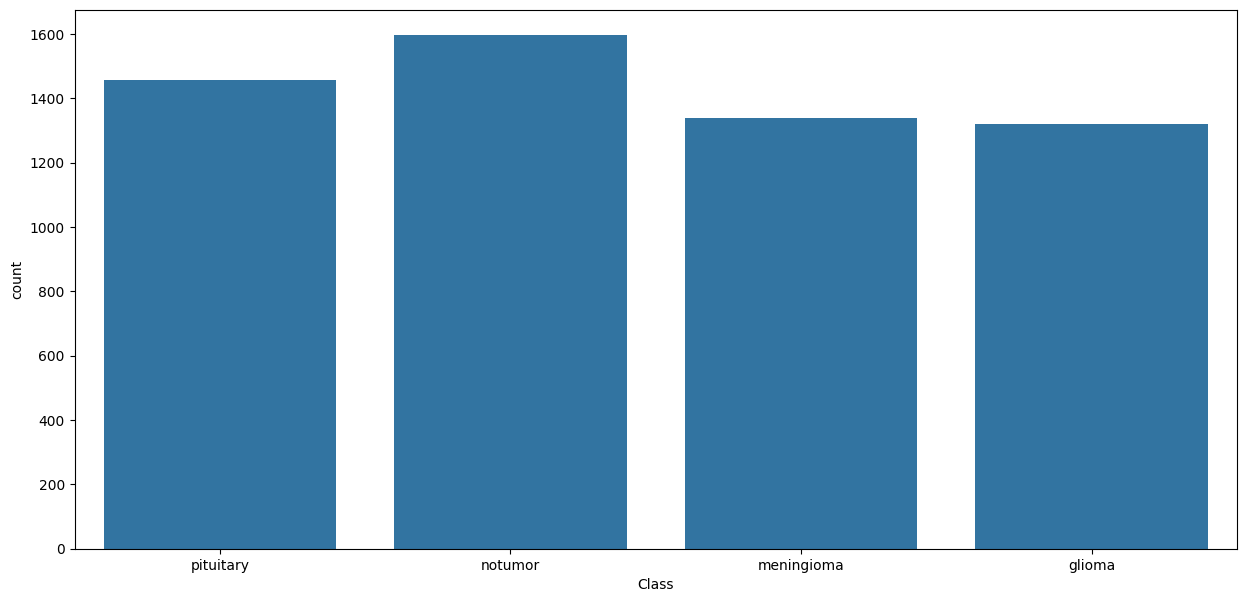

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

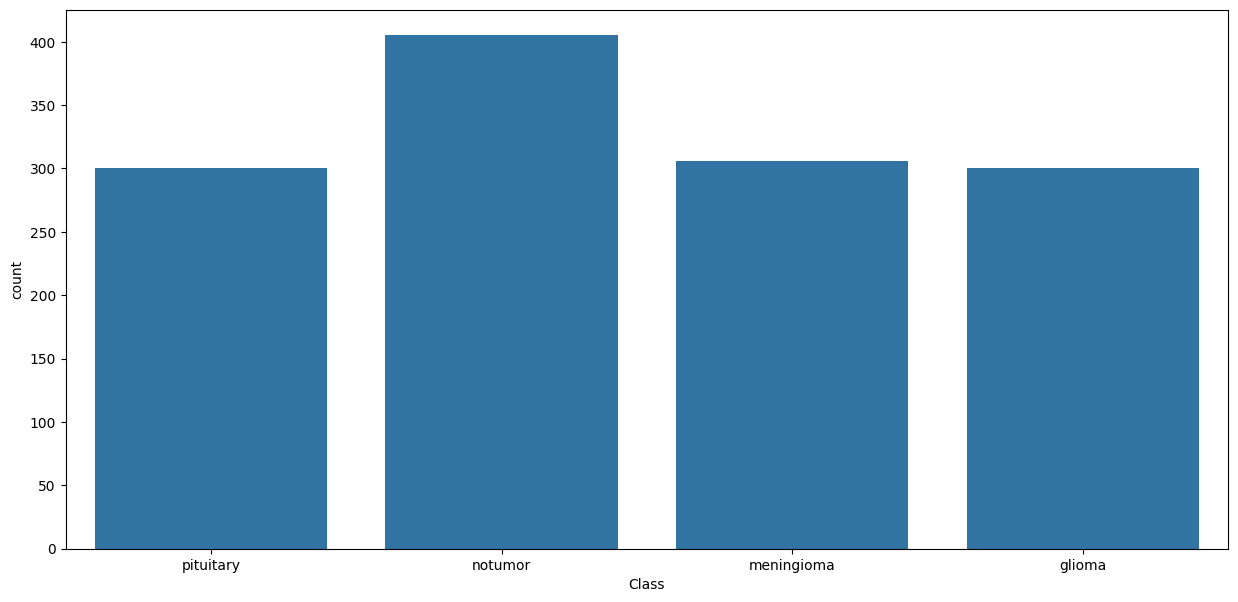

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#stratify maintains appropriate proportions
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
87,/content/Testing/pituitary/Te-pi_0063.jpg,pituitary
750,/content/Testing/meningioma/Te-me_0276.jpg,meningioma
528,/content/Testing/notumor/Te-no_0359.jpg,notumor
589,/content/Testing/notumor/Te-no_0026.jpg,notumor
498,/content/Testing/notumor/Te-no_0260.jpg,notumor
...,...,...
257,/content/Testing/pituitary/Te-pi_0016.jpg,pituitary
93,/content/Testing/pituitary/Te-pi_0095.jpg,pituitary
820,/content/Testing/meningioma/Te-me_0010.jpg,meningioma
61,/content/Testing/pituitary/Te-pi_0213.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
1310,/content/Testing/glioma/Te-gl_0130.jpg,glioma
804,/content/Testing/meningioma/Te-me_0160.jpg,meningioma
475,/content/Testing/notumor/Te-no_0312.jpg,notumor
1015,/content/Testing/glioma/Te-gl_0013.jpg,glioma
443,/content/Testing/notumor/Te-no_0178.jpg,notumor
...,...,...
32,/content/Testing/pituitary/Te-pi_0027.jpg,pituitary
201,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
817,/content/Testing/meningioma/Te-me_0084.jpg,meningioma
500,/content/Testing/notumor/Te-no_0038.jpg,notumor


In [ ]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col="Class", batch_size=16, target_size=img_size, shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


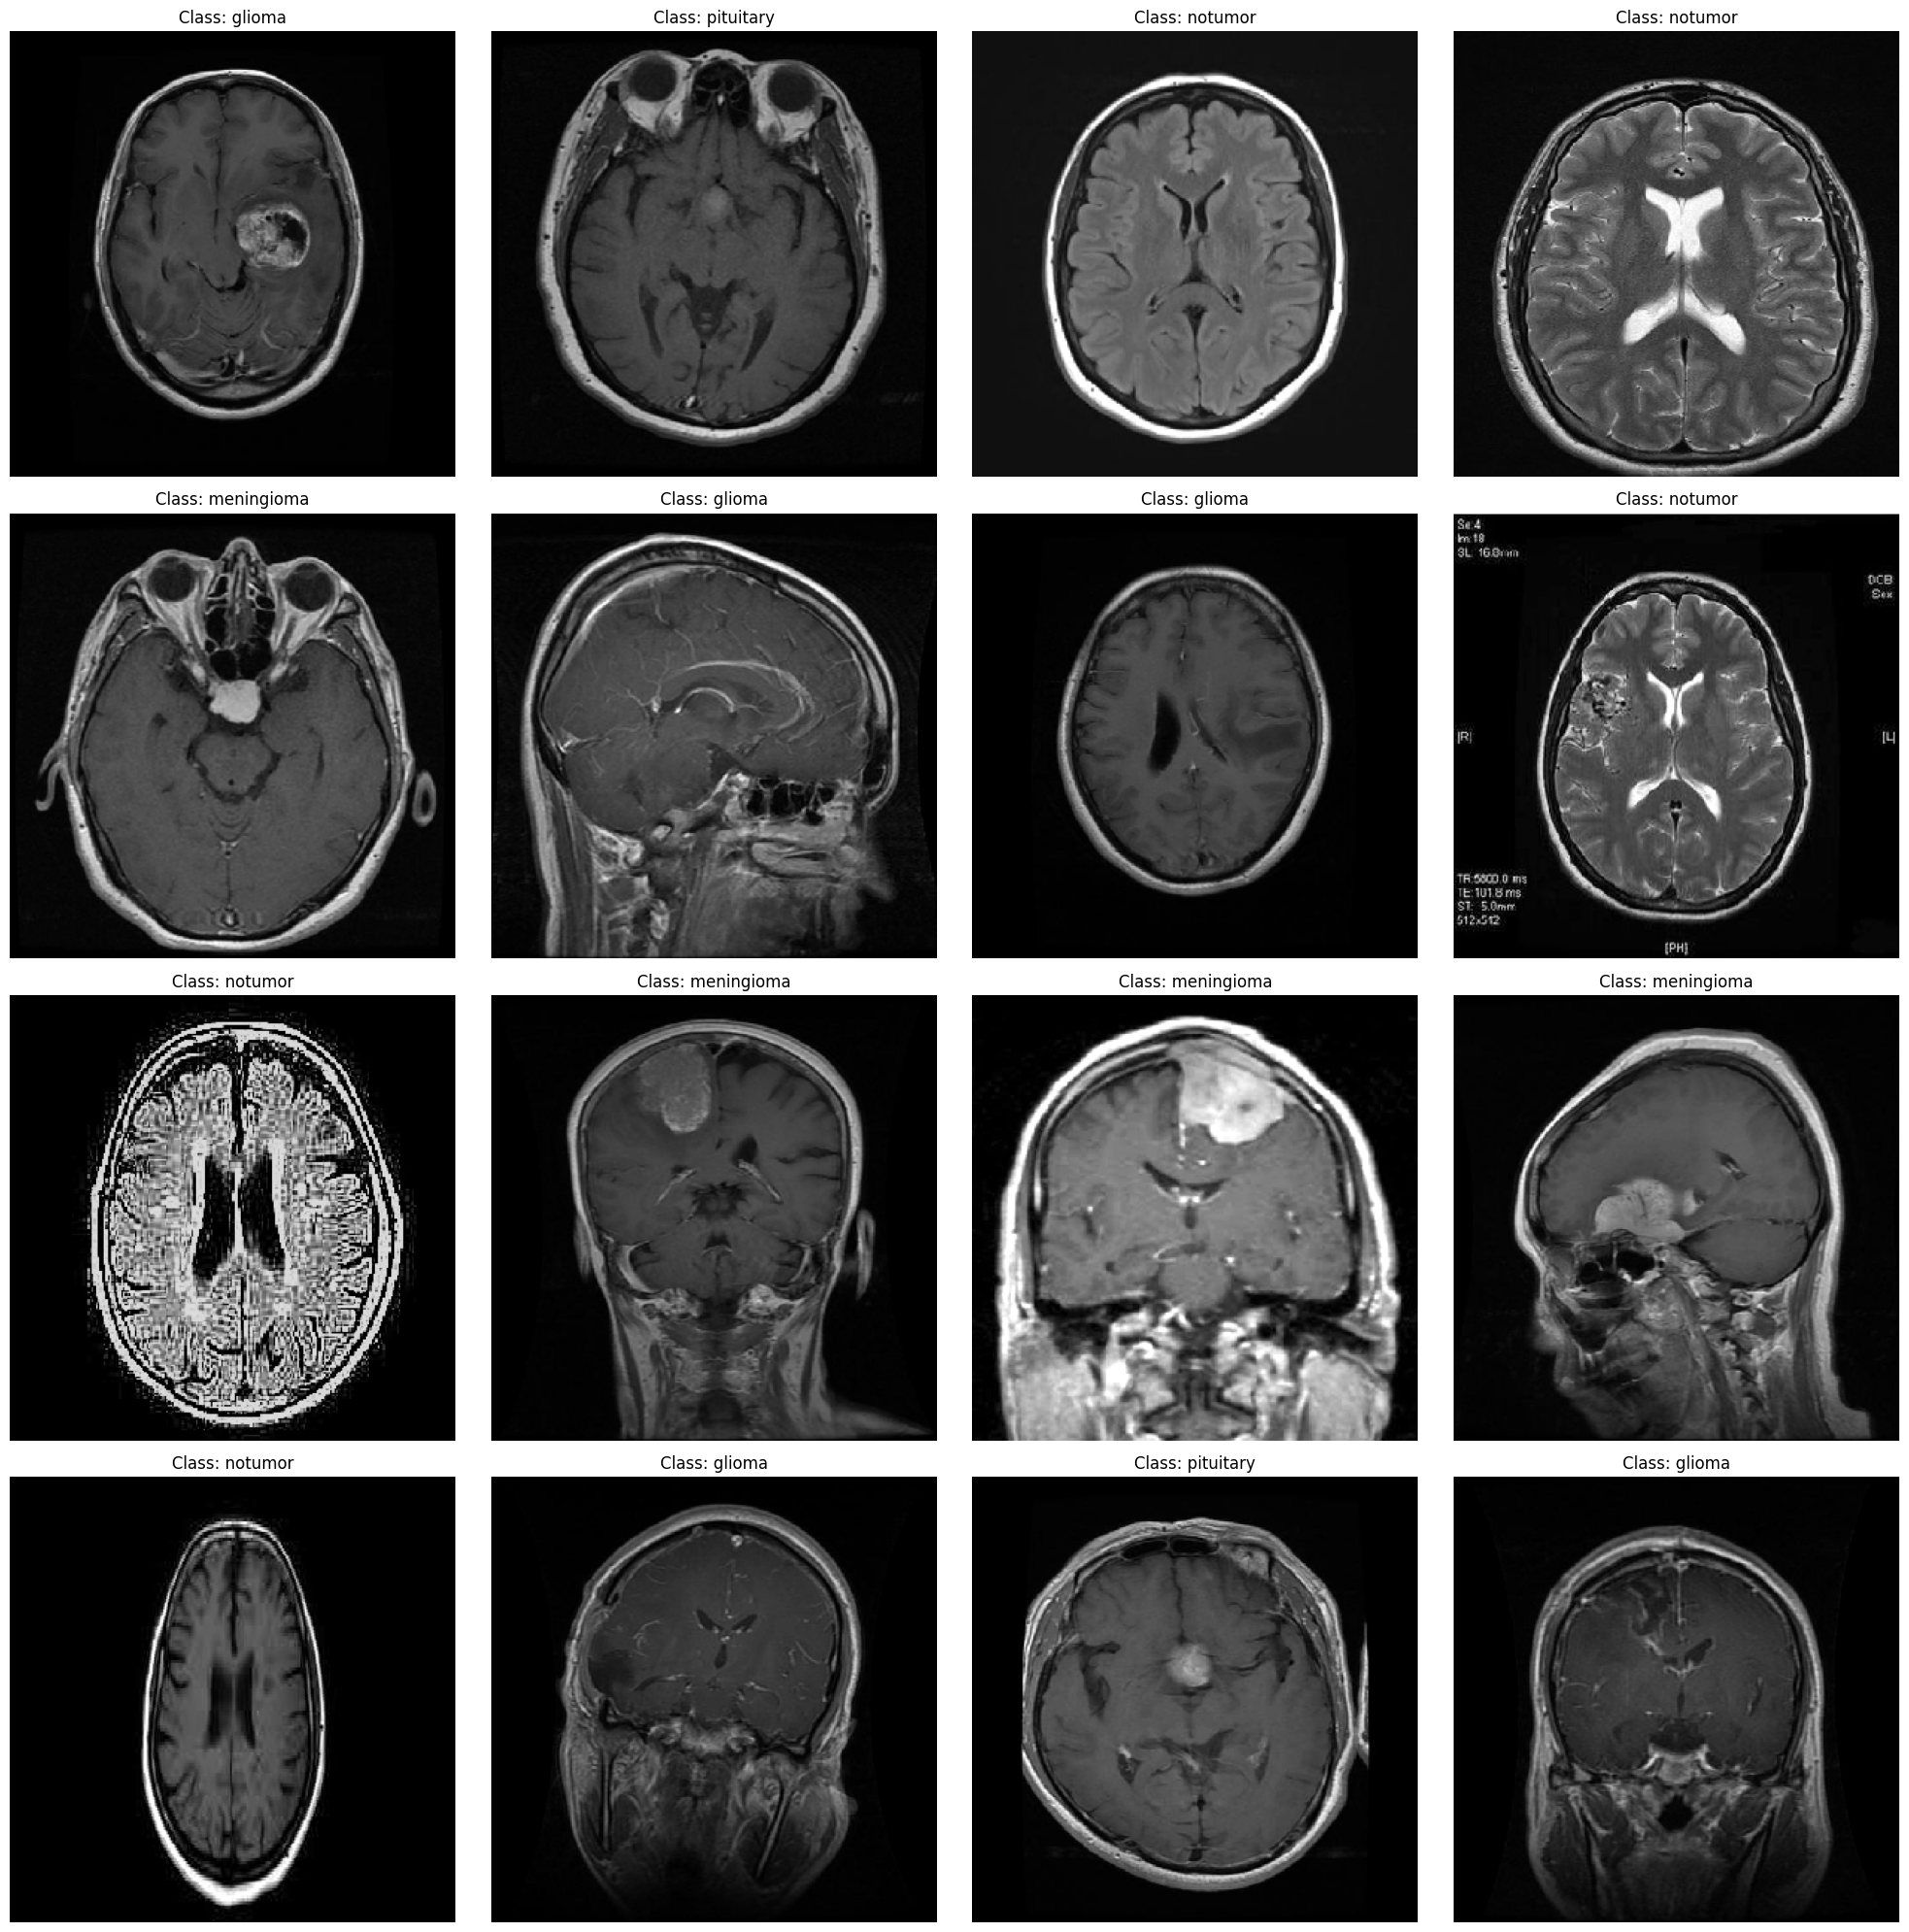

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)
  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  index_position = class_indices.index(class_index)
  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights='imagenet',
                                            input_shape=img_shape,
                                            pooling='max')

model = Sequential([
                    base_model,
                    Flatten(),
                    Dropout(rate=0.3),
                    Dense(128, activation='relu'),
                    Dropout(rate=0.24),
                    Dense(4, activation='softmax')
                    ])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 167s 584ms/step - accuracy: 0.8078 - loss: 0.5706 - precision: 0.8546 - recall: 0.7299 - val_accuracy: 0.8824 - val_loss: 0.3820 - val_precision: 0.8882 - val_recall: 0.8733
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 365ms/step - accuracy: 0.9804 - loss: 0.0595 - precision: 0.9821 - recall: 0.9784 - val_accuracy: 0.9664 - val_loss: 0.1120 - val_precision: 0.9694 - val_recall: 0.9664
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.9948 - loss: 0.0233 - precision: 0.9954 - recall: 0.9946 - val_accuracy: 0.9847 - val_loss: 0.0561 - val_precision: 0.9847 - val_recall: 0.9832
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.9972 - loss: 0.0079 - precision: 0.9973 - recall: 0.9972 - val_accuracy: 0.9924 - val_loss: 0.0197 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.9963 - loss: 0.0128 - precision: 0.9963 - recall: 0.9962 - val_accuracy: 0.9878 - val_loss: 0

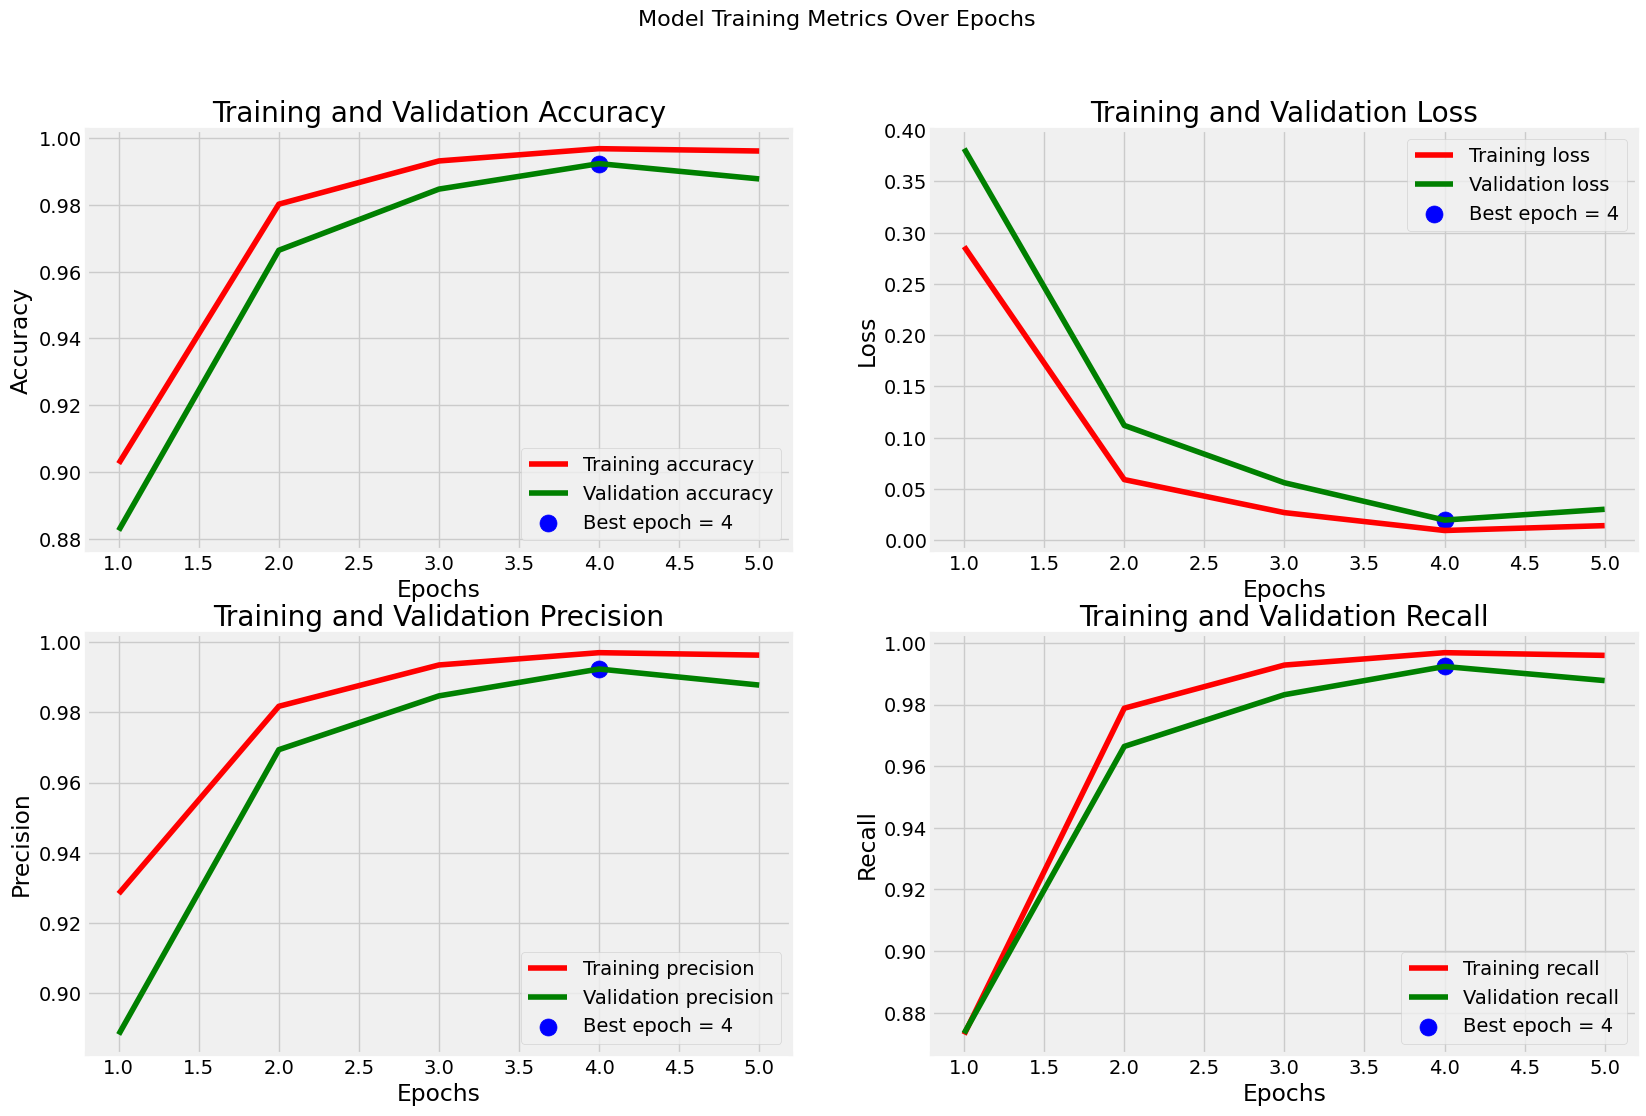

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Validation loss:', valid_score[0])
print('Validation accuracy:', valid_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.9995 - loss: 0.0035 - precision: 0.9995 - recall: 0.9995
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9857 - loss: 0.0356 - precision: 0.9857 - recall: 0.9857
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 9.3044e-05 - precision: 1.0000 - recall: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9927 - loss: 0.0183 - precision: 0.9927 - recall: 0.9927
Train loss: 0.0035497001372277737
Train accuracy: 0.9991246461868286
Validation loss: 0.03054049052298069
Validation accuracy: 0.9908397197723389
Test loss: 0.02110106684267521
Test accuracy: 0.9923780560493469


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


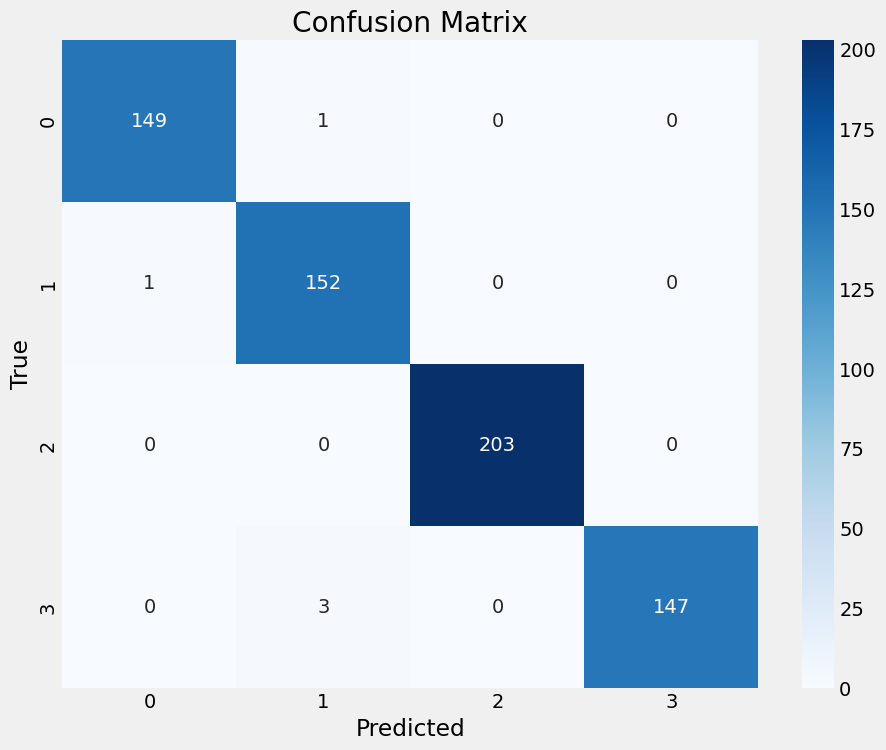

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0:'glioma_tumor',
    1:'meningioma_tumor',
    2:'no_tumor',
    3:'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels  =  list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


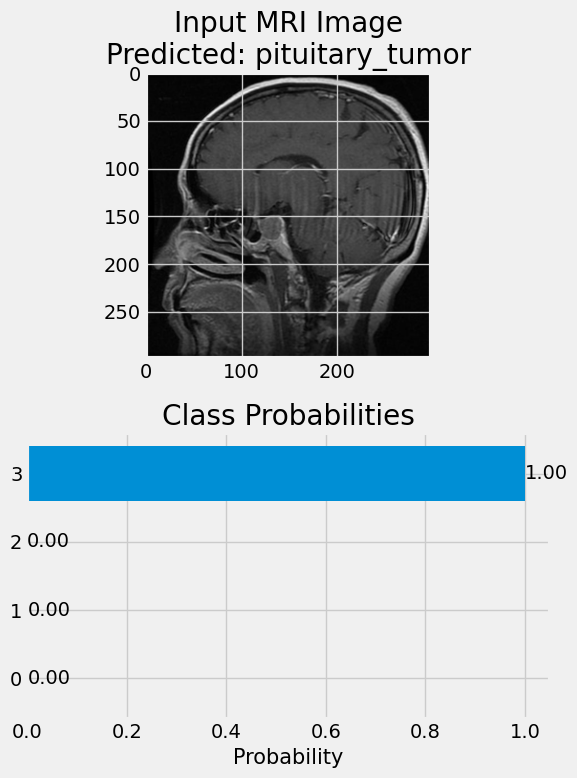


Predicted tumor type: pituitary_tumor


In [ ]:
predict("/content/Testing/pituitary/Te-piTr_0007.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
#CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers


In [ ]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col="Class", batch_size=16, target_size=img_size, shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 95s 214ms/step - accuracy: 0.5689 - loss: 2.4082 - precision_1: 0.6899 - recall_1: 0.3631 - val_accuracy: 0.7298 - val_loss: 0.9754 - val_precision_1: 0.7828 - val_recall_1: 0.6550
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 64s 178ms/step - accuracy: 0.8087 - loss: 0.7412 - precision_1: 0.8335 - recall_1: 0.7780 - val_accuracy: 0.7817 - val_loss: 0.6771 - val_precision_1: 0.8003 - val_recall_1: 0.7527
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 64s 178ms/step - accuracy: 0.8474 - loss: 0.5562 - precision_1: 0.8612 - recall_1: 0.8315 - val_accuracy: 0.8427 - val_loss: 0.5188 - val_precision_1: 0.8640 - val_recall_1: 0.8244
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 64s 178ms/step - accuracy: 0.8947 - loss: 0.4198 - precision_1: 0.9036 - recall_1: 0.8827 - val_accuracy: 0.8763 - val_loss: 0.4705 - val_precision_1: 0.8903 - val_recall_1: 0.8550
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 64s 178ms/step - accuracy: 0.9174 - loss: 0.3752 - precision_1: 0.9221 - recall_1: 0.9083 -

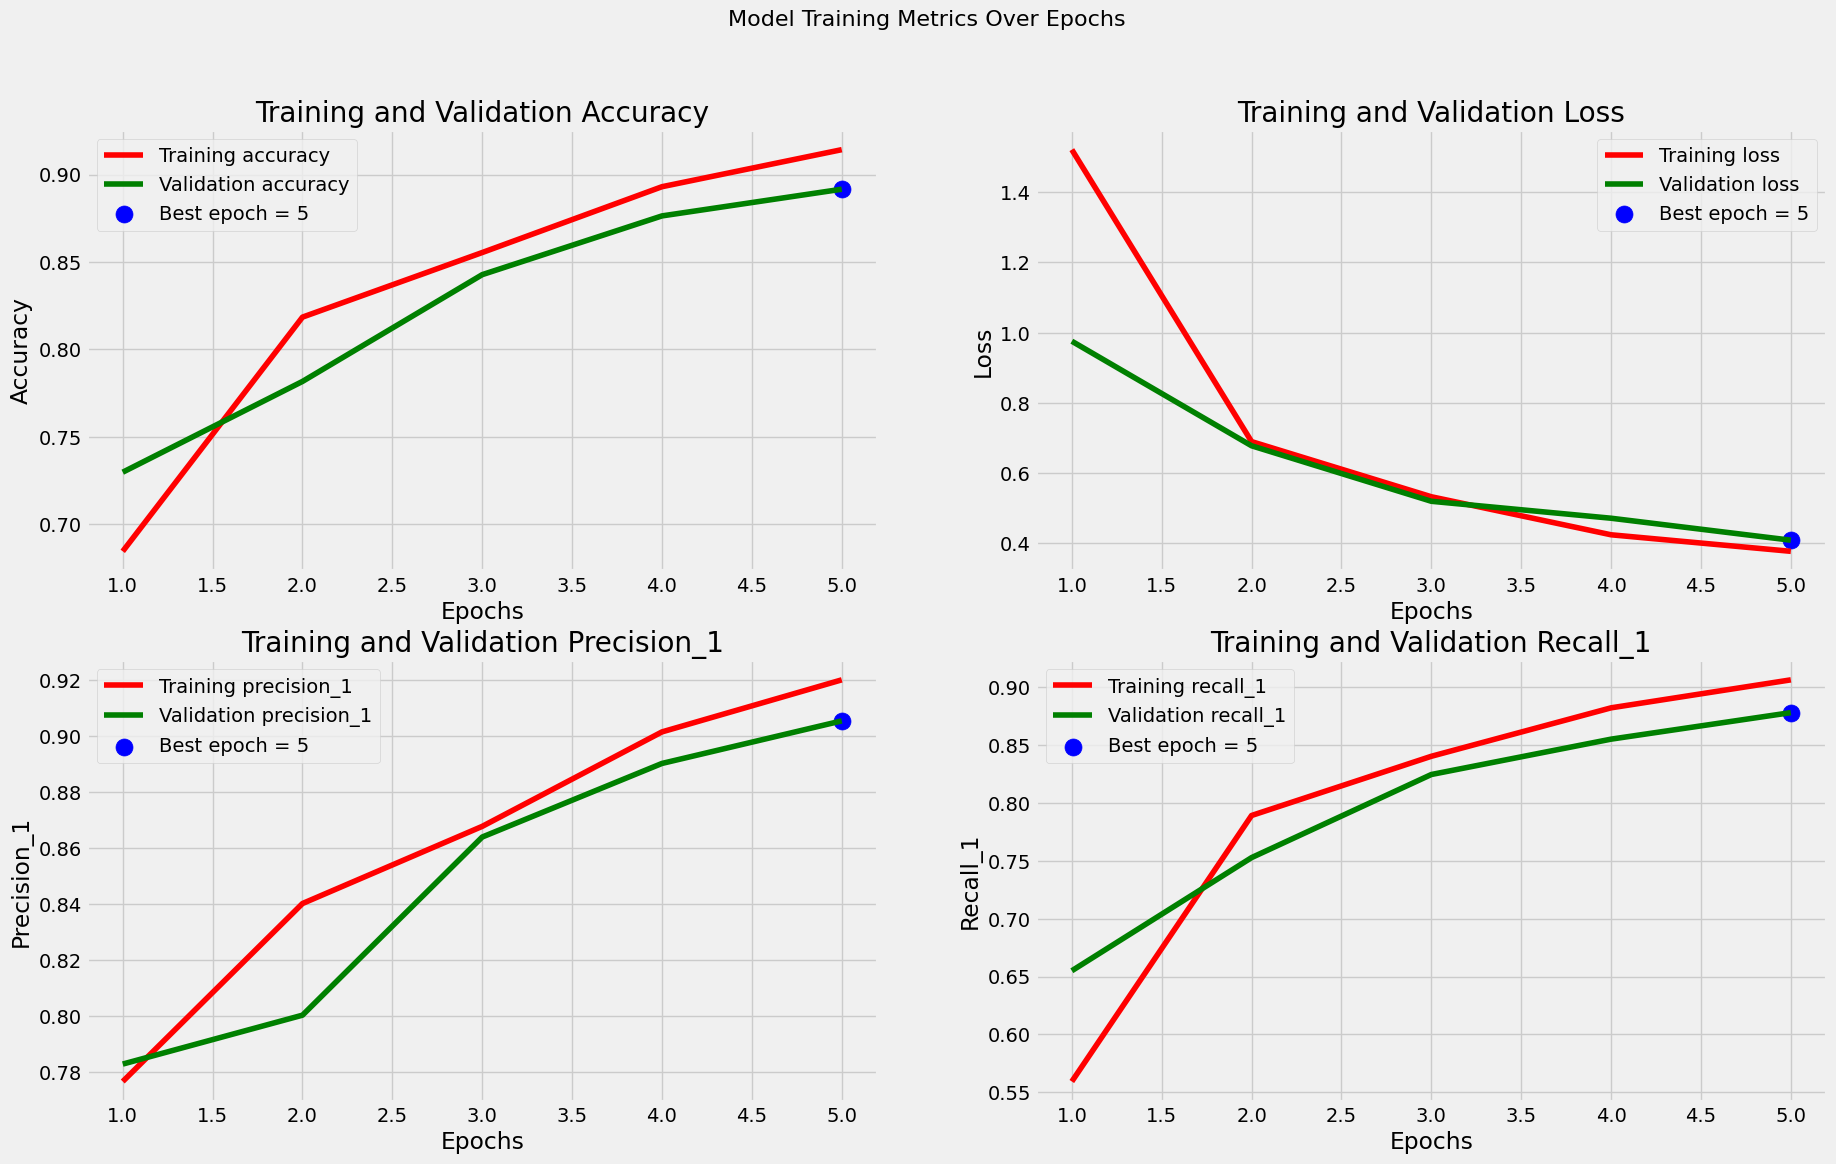

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = cnn_model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Validation loss:', valid_score[0])
print('Validation accuracy:', valid_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9425 - loss: 0.3008 - precision_1: 0.9496 - recall_1: 0.9357
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8947 - loss: 0.3979 - precision_1: 0.9057 - recall_1: 0.8860
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8924 - loss: 0.3701 - precision_1: 0.9236 - recall_1: 0.8368

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8912 - loss: 0.3915 - precision_1: 0.9103 - recall_1: 0.8769
Train loss: 0.3046306073665619
Train accuracy: 0.9404761791229248
Validation loss: 0.405186265707016
Validation accuracy: 0.8885496258735657
Test loss: 0.38923704624176025
Test accuracy: 0.8963414430618286


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


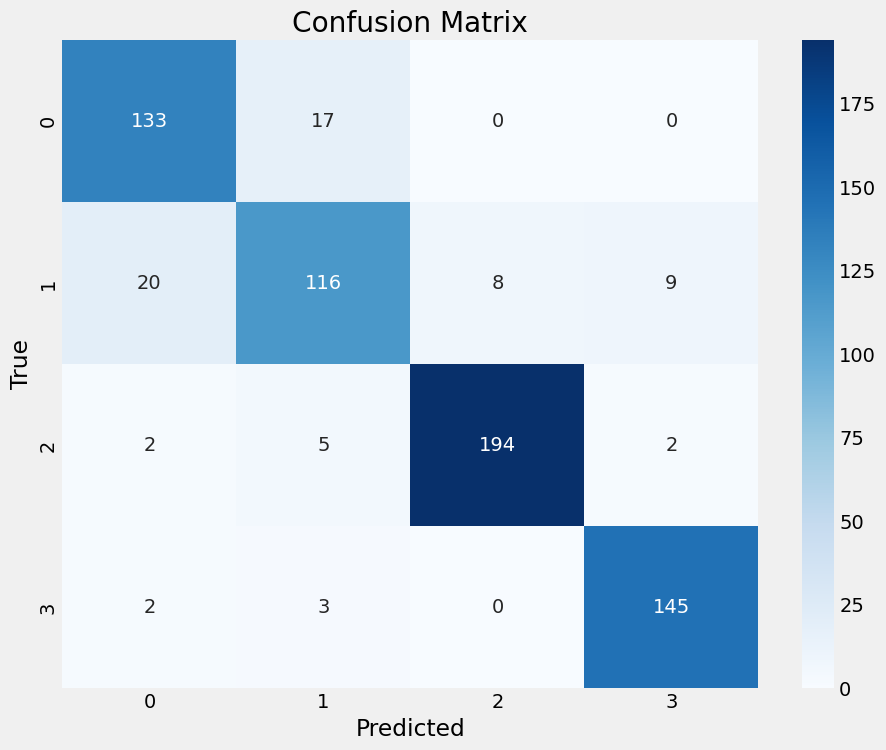

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0:'glioma_tumor',
    1:'meningioma_tumor',
    2:'no_tumor',
    3:'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels  =  list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)

In [ ]:
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       150
           1       0.82      0.76      0.79       153
           2       0.96      0.96      0.96       203
           3       0.93      0.97      0.95       150

    accuracy                           0.90       656
   macro avg       0.89      0.89      0.89       656
weighted avg       0.90      0.90      0.90       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [96]:
! pip install streamlit pyngrok python-dotenv


In [97]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [98]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(ngrok_token)

In [99]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [116]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
import plotly.graph_objects as go
import cv2
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
import google.generativeai as genai

load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)


def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
The saliency map was generated by a deep learning model that was trained to classify brain tumors
as either glioma, meningioma, pituitary, or no tumor.

The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

In your response:
- Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
  in light cyan, those are the regions where the model is focusing on.
- Explain possible reasons why the model made the prediction it did.
- Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
  in your explanation.
- Keep your explanation to 4 sentences max.

Lets think step by step about this. Verify step by step.
"""

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text




def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[0, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model


st.title("Brain tumor classification")
st.write("Upload an image of a brain MRI scan to classify the type of tumor.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select a model:",
      ("Transfer Learning","Custom CNN")
  )

  if selected_model == "Transfer Learning":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions")
  for label, prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
      st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
  with col2:
      st.image(saliency_map, caption='Saliency Map', use_column_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
          <div style="display: flex; justify-content: space-between; align-items: center;">
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                      {result}
                  </p>
              </div>
              <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4%}
                  </p>
              </div>
          </div>
      </div>
      """,
      unsafe_allow_html=True
  )


  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)



Overwriting app.py


In [117]:
thread = Thread(target=run_streamlit)
thread.start()

In [118]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://64c8-34-16-175-196.ngrok-free.app" -> "http://localhost:8501"


In [103]:
! pip install google-generativeai




In [111]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  ngrok.disconnect(tunnel.public_url)